<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [442]:
import pandas as pd
import psycopg2

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 


In [444]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [445]:

# текст запроса
query_3_1 = f'''select * 
            from vacancies 
           
         '''


In [ ]:
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_3_1, connection)

vacans=df['name'].count()
print(f"В базе вакансий:{vacans}")


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\3306647298.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


В базе вакансий:49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [447]:
# текст запроса
query_3_1 = f'''select * 
            from employers 
           
         '''


In [448]:
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_3_1, connection)
rabotodat=df['name'].count()
print(f"В базе  работодателей:{rabotodat}")

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2389805788.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


В базе  работодателей:23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [449]:
# текст запроса
query_3_1 = f'''select * 
            from areas 
           
         '''


In [450]:
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_3_1, connection)
region=df['name'].count()
print(f"В базе  регионов :{region}")

В базе  регионов :1362


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2324758966.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [451]:
# текст запроса
query_3_1 = f'''select * 
            from industries 
           
         '''


In [452]:
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df_industries = pd.read_sql_query(query_3_1, connection)

sfer=df_industries['name'].count()
print(f"В базе  сфер:{sfer}")

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\4006783178.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_industries = pd.read_sql_query(query_3_1, connection)


В базе  сфер:294


***

In [453]:

print("="*50)
print(" СОДЕРЖИМОЕ ТАБЛИЦЫ industries")
print("="*50)

# 1. Общая информация
print(f"\n Всего записей: {len(df_industries)}")
print(f" Столбцы: {', '.join(df_industries.columns)}")

# 2. Первые 5 записей
print("\n Первые 5 записей:")
print(df_industries.head().to_string(index=False))

# 3. Последние 5 записей
print("\n Последние 5 записей:")
print(df_industries.tail().to_string(index=False))

# 4. Краткая статистика
print("\n Краткая информация:")
print(f"   • id: от {df_industries['id'].min()} до {df_industries['id'].max()}")
print(f"   • Уникальных названий сфер: {df_industries['name'].nunique()}")

# 5. Примеры названий
print("\n Примеры сфер деятельности (первые 10):")
for i, name in enumerate(df_industries['name'].head(10), 1):
    print(f"   {i}. {name}")

print("\n" + "="*50)
print(" Вывод завершён")

 СОДЕРЖИМОЕ ТАБЛИЦЫ industries

 Всего записей: 294
 Столбцы: id, name

 Первые 5 записей:
    id                                                                                               name
 7.540                                                                Разработка программного обеспечения
 7.539 Системная интеграция,  автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг
27.550                                                              Безалкогольные напитки (производство)
27.551                                             Безалкогольные напитки (продвижение, оптовая торговля)
13.664                                                             Управление и эксплуатация недвижимости

 Последние 5 записей:
     id                                                                                                name
 37.626                                                              Ассоциация в сфере культуры, искусства
 42.603                           

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [454]:
query_3_1 = """
SELECT 
    a.name AS area,
    COUNT(v.id) AS cnt
FROM vacancies v
LEFT JOIN areas a ON v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC;
"""





In [455]:
# Получение результатов сразу в DataFrame
df = pd.read_sql_query(query_3_1, connection)
# Просмотр результата
print(df.head())

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\1926550172.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


              area   cnt
0           Москва  5333
1  Санкт-Петербург  2851
2            Минск  2112
3      Новосибирск  2006
4           Алматы  1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [456]:
query_3_2 = """
SELECT 
    COUNT(*) AS cnt
FROM vacancies
WHERE salary_from IS NOT NULL 
   OR salary_to IS NOT NULL;
"""



In [457]:
df = pd.read_sql_query(query_3_2, connection)
print(df)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\198591577.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


     cnt
0  24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [458]:
query_4_3 = """
SELECT 
    ROUND(AVG(salary_from)) AS avg_salary_from_all,
    ROUND(AVG(salary_to)) AS avg_salary_to_all
FROM vacancies
"""



In [459]:
df = pd.read_sql_query(query_4_3, connection)
print(df)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\261386216.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


   avg_salary_from_all  avg_salary_to_all
0              71065.0           110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [460]:
query_4_4 = """
SELECT 
    schedule,
    employment,
    COUNT(*) AS cnt
FROM vacancies
WHERE schedule IS NOT NULL 
  AND employment IS NOT NULL
GROUP BY schedule, employment
ORDER BY cnt DESC
LIMIT 1 OFFSET 1;
"""



In [461]:
df = pd.read_sql_query(query_4_4, connection)
print(df)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\3904735251.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


           schedule        employment   cnt
0  Удаленная работа  Полная занятость  7802


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [462]:
query_4_5 = """
SELECT 
    experience,
    COUNT(*) AS cnt
FROM vacancies
WHERE experience IS NOT NULL
GROUP BY experience
ORDER BY cnt ASC;
"""




In [463]:
df = pd.read_sql_query(query_4_5, connection)
print(df)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2220680361.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


           experience    cnt
0         Более 6 лет   1337
1           Нет опыта   7197
2       От 3 до 6 лет  14511
3  От 1 года до 3 лет  26152


***

In [464]:

# КРАТКИЙ ВЫВОД
print("="*60)
print(" РАСПРЕДЕЛЕНИЕ ВАКАНСИЙ ПО ТРЕБУЕМОМУ ОПЫТУ")
print("="*60)

# Выводим данные в читаемом формате
for _, row in df.iterrows():
    exp = row['experience']
    cnt = row['cnt']
    # Рисуем простую гистограмму в консоли
    bars = '' * int(cnt / 1000)  # 1 символ = 1000 вакансий
    print(f"{exp:25} : {cnt:6,} вакансий {bars}".replace(',', ' '))

# Добавляем итоги
print("-"*60)
total = df['cnt'].sum()
print(f"{'ВСЕГО':25} : {total:6,} вакансий".replace(',', ' '))

# Процентное распределение
print("\n РАСПРЕДЕЛЕНИЕ В ПРОЦЕНТАХ:")
for _, row in df.iterrows():
    percent = (row['cnt'] / total * 100)
    print(f"{row['experience']:25} : {percent:5.1f}%")

# Ключевой вывод
print("\n" + "="*60)
print(" КЛЮЧЕВОЙ ВЫВОД:")
most_common = df.loc[df['cnt'].idxmax()]
least_common = df.loc[df['cnt'].idxmin()]

print(f"• Самый востребованный опыт: {most_common['experience']} ({most_common['cnt']} вакансий, {most_common['cnt']/total*100:.1f}%)")
print(f"• Самый редкий опыт: {least_common['experience']} ({least_common['cnt']} вакансий, {least_common['cnt']/total*100:.1f}%)")

# Дополнительный инсайт
junior_cnt = df[df['experience'] == 'Нет опыта']['cnt'].iloc[0] if 'Нет опыта' in df['experience'].values else 0
junior_percent = (junior_cnt / total * 100)
print(f"\n Доля вакансий для начинающих (без опыта): {junior_percent:.1f}%")

print("="*60)

 РАСПРЕДЕЛЕНИЕ ВАКАНСИЙ ПО ТРЕБУЕМОМУ ОПЫТУ
Более 6 лет               :  1 337 вакансий 
Нет опыта                 :  7 197 вакансий 
От 3 до 6 лет             : 14 511 вакансий 
От 1 года до 3 лет        : 26 152 вакансий 
------------------------------------------------------------
ВСЕГО                     : 49 197 вакансий

 РАСПРЕДЕЛЕНИЕ В ПРОЦЕНТАХ:
Более 6 лет               :   2.7%
Нет опыта                 :  14.6%
От 3 до 6 лет             :  29.5%
От 1 года до 3 лет        :  53.2%

 КЛЮЧЕВОЙ ВЫВОД:
• Самый востребованный опыт: От 1 года до 3 лет (26152 вакансий, 53.2%)
• Самый редкий опыт: Более 6 лет (1337 вакансий, 2.7%)

 Доля вакансий для начинающих (без опыта): 14.6%


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [465]:
query_5_1 = """
WITH employer_vacancies AS (
    SELECT 
        e.name AS employer_name,
        COUNT(v.id) AS vacancy_count
    FROM employers e
    LEFT JOIN vacancies v ON e.id = v.employer_id
    GROUP BY e.id, e.name
),
ranked_employers AS (
    SELECT 
        employer_name,
        vacancy_count,
        ROW_NUMBER() OVER (ORDER BY vacancy_count DESC) AS rank
    FROM employer_vacancies
)
SELECT 
    rank,
    employer_name,
    vacancy_count
FROM ranked_employers
WHERE rank IN (1, 5)
ORDER BY rank;
"""




In [466]:
df = pd.read_sql_query(query_5_1, connection)
print(df)

   rank  employer_name  vacancy_count
0     1         Яндекс           1933
1     5  Газпром нефть            331


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\303496794.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [467]:
query_5_2 = """
SELECT 
    a.name AS region_name,
    COUNT(DISTINCT e.id) AS employers_cnt,
    COUNT(v.id) AS vacancies_cnt
FROM areas a
LEFT JOIN vacancies v ON a.id = v.area_id
LEFT JOIN employers e ON v.employer_id = e.id
GROUP BY a.id, a.name
HAVING COUNT(v.id) = 0
ORDER BY COUNT(DISTINCT e.id) DESC
LIMIT 1;
   
"""




In [468]:
df = pd.read_sql_query(query_5_2, connection)
print(df)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2309033045.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


  region_name  employers_cnt  vacancies_cnt
0   Австралия              0              0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [469]:
query = """
SELECT 
    e.name AS employer_name,
    COUNT(DISTINCT v.area_id) AS regions_cnt
FROM employers e
JOIN vacancies v ON e.id = v.employer_id
WHERE v.area_id IS NOT NULL
GROUP BY e.id, e.name
ORDER BY regions_cnt DESC;
   
"""



In [470]:
df = pd.read_sql_query(query, connection)
print(df)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2479061017.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


                                employer_name  regions_cnt
0                                      Яндекс          181
1                                  Ростелеком          152
2                                  Спецремонт          116
3                      Поляков Денис Иванович           88
4                                   ООО ЕФИН            71
...                                       ...          ...
14901                            НПП Авиатрон            1
14902              Центр дистанционных торгов            1
14903  Городские Телекоммуникационные Системы            1
14904                       Введенский, Отель            1
14905              Группа Компаний Автоимпорт            1

[14906 rows x 2 columns]


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [471]:
query_5_4 = """
SELECT 
    COUNT(*) AS employers_without_industry
FROM employers e
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL;
"""



In [472]:
df = pd.read_sql_query(query_5_4, connection)
print(df)

   employers_without_industry
0                        8419


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2937470563.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [473]:
query = """
SELECT 
    e.name
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id, e.name
HAVING COUNT(ei.industry_id) = 4
ORDER BY e.name
LIMIT 1 OFFSET 2;
"""


In [474]:
df = pd.read_sql_query(query, connection)
print(df)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2479061017.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


   name
0  2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [475]:
# Пример выполнения в Python
query = """
SELECT 
    COUNT(DISTINCT ei.employer_id) AS employers_cnt
FROM employers_industries ei
JOIN industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
"""


In [476]:
df_result = pd.read_sql_query(query, connection)
print(df_result)

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\1048667026.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql_query(query, connection)


   employers_cnt
0           3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [477]:

import requests
from io import StringIO

# === 1. ПОЛУЧАЕМ СПИСОК ГОРОДОВ ИЗ ВИКИПЕДИИ ===
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}

response = requests.get(url, headers=headers)
response.encoding = 'utf-8'
html_content = response.text

# Читаем все таблицы
tables = pd.read_html(StringIO(html_content))
# Берём таблицу с городами (индекс 0) и извлекаем второй столбец
wiki_cities = tables[0].iloc[:, 1].tolist()[:16]
# Очищаем от примечаний
wiki_cities = [str(city).split('[')[0].strip() for city in wiki_cities]

print("Города из Википедии:")
for i, city in enumerate(wiki_cities, 1):
    print(f"  {i}. {city}")

# === 2. ФОРМИРУЕМ SQL ЗАПРОС (ИСПРАВЛЕННЫЙ ДЛЯ SQLITE) ===
print(f"\n Будем использовать {len(wiki_cities)} городов")

# Создаём VALUES часть
values_list = []
for city in wiki_cities:
    city_escaped = city.replace("'", "''")
    values_list.append(f"('{city_escaped}')")
values = ', '.join(values_list)

# Создаём кортеж для IN
cities_tuple = '(' + ', '.join([f"'{city}'" for city in wiki_cities]) + ')'

# ФИНАЛЬНЫЙ ИСПРАВЛЕННЫЙ ЗАПРОС
sql_query = f"""
SELECT name, cnt FROM (
    WITH 
    cities(name) AS (VALUES {values}),
    vacancies_in_cities AS (
        SELECT a.name, COUNT(*) as cnt
        FROM vacancies v
        JOIN employers e ON v.employer_id = e.id
        JOIN areas a ON v.area_id = a.id
        WHERE e.name = 'Яндекс' AND a.name IN {cities_tuple}
        GROUP BY a.name
    )
    SELECT 
        cities.name,
        COALESCE(vacancies_in_cities.cnt, 0) as cnt,
        0 as sort_order
    FROM cities
    LEFT JOIN vacancies_in_cities ON cities.name = vacancies_in_cities.name
    
    UNION ALL
    
    SELECT 
        'Total' as name,
        COUNT(*) as cnt,
        1 as sort_order
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс'
) t
ORDER BY sort_order, cnt;
"""

# Выполняем запрос
try:
    df = pd.read_sql_query(sql_query, connection)
    print("\n Результат:")
    print(df)
except Exception as e:
    print(f"\n Ошибка SQL: {e}")
    print("\n Запрос:")
    print(sql_query)



    # Проверка общего количества вакансий Яндекса
total_check = pd.read_sql_query("""
    SELECT COUNT(*) as total_vacancies
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс'
""", connection)

print(f"Общее количество вакансий Яндекса: {total_check.iloc[0, 0]}")


# Проверка по городам
cities = [
    'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
    'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск',
    'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону',
    'Омск', 'Воронеж', 'Пермь', 'Волгоград'
]

print("Вакансии по городам:")
total = 0
for city in cities:
    query = f"""
        SELECT COUNT(*) as cnt
        FROM vacancies v
        JOIN employers e ON v.employer_id = e.id
        JOIN areas a ON v.area_id = a.id
        WHERE e.name = 'Яндекс' AND a.name = '{city}'
    """
    cnt = pd.read_sql_query(query, connection).iloc[0, 0]
    print(f"{city:20} : {cnt}")
    total += cnt

print(f"{'Сумма по миллионникам':20} : {total}")
print(f"{'Total в предыдущем запросе':20} : 1933")
print(f"{'Разница':20} : {1933 - total}")

Города из Википедии:
  1. Москва
  2. Санкт-Петербург
  3. Новосибирск
  4. Екатеринбург
  5. Казань
  6. Красноярск
  7. Нижний Новгород
  8. Челябинск
  9. Уфа
  10. Краснодар
  11. Самара
  12. Ростов-на-Дону
  13. Омск
  14. Воронеж
  15. Пермь
  16. Волгоград

 Будем использовать 16 городов

 Результат:
               name   cnt
0              Омск    21
1         Челябинск    22
2        Красноярск    23
3         Волгоград    24
4            Казань    25
5    Ростов-на-Дону    25
6             Пермь    25
7               Уфа    26
8            Самара    26
9         Краснодар    30
10          Воронеж    32
11      Новосибирск    35
12  Нижний Новгород    36
13     Екатеринбург    39
14  Санкт-Петербург    42
15           Москва    54
16            Total  1933


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\1245510498.py:71: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, connection)
C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\1245510498.py:82: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_check = pd.read_sql_query("""


Общее количество вакансий Яндекса: 1933
Вакансии по городам:
Москва               : 54


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\1245510498.py:110: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt = pd.read_sql_query(query, connection).iloc[0, 0]


Санкт-Петербург      : 42
Новосибирск          : 35
Екатеринбург         : 39
Казань               : 25
Красноярск           : 23
Нижний Новгород      : 36
Челябинск            : 22
Уфа                  : 26
Краснодар            : 30
Самара               : 26
Ростов-на-Дону       : 25
Омск                 : 21
Воронеж              : 32
Пермь                : 25
Волгоград            : 24
Сумма по миллионникам : 485
Total в предыдущем запросе : 1933
Разница              : 1448


***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [478]:

query = """
SELECT COUNT(*) as data_vacancies_cnt
FROM vacancies
WHERE LOWER(name) LIKE '%data%' 
   OR LOWER(name) LIKE '%данн%';
"""


In [479]:
df = pd.read_sql_query(query, connection)
print(f"Количество вакансий, связанных с данными: {df.iloc[0, 0]}")

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\194340784.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Количество вакансий, связанных с данными: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [480]:

query = """
WITH ds_vacancies AS (
    -- Вакансии, относящиеся к Data Science
    SELECT id, name, experience, employment
    FROM vacancies
    WHERE 
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT COUNT(*) as junior_ds_cnt
FROM ds_vacancies
WHERE 
    LOWER(name) LIKE '%junior%' OR
    experience = 'Нет опыта' OR
    employment = 'Стажировка';
"""


In [481]:

df = pd.read_sql_query(query, connection)
print(f"Количество вакансий для начинающего дата-сайентиста: {df.iloc[0, 0]}")

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\1411856280.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Количество вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [482]:


query = """
WITH ds_vacancies AS (
    -- Находим все DS-вакансии
    SELECT id
    FROM vacancies
    WHERE 
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT COUNT(*) as sql_vacancies_cnt
FROM vacancies v
JOIN ds_vacancies dv ON v.id = dv.id
WHERE 

    LOWER(v.key_skills) LIKE '%sql%' OR
    LOWER(v.key_skills) LIKE '%postgres%';
"""



In [483]:
df = pd.read_sql_query(query, connection)
print(f"Количество DS-вакансий с SQL или Postgres: {df.iloc[0, 0]}")

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\2885386601.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Количество DS-вакансий с SQL или Postgres: 229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [484]:

query = """
WITH ds_vacancies AS (
    -- Находим все DS-вакансии
    SELECT id
    FROM vacancies
    WHERE 
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%machine learning%' OR
        LOWER(name) LIKE '%машинн%обучен%'
)
SELECT COUNT(*) as python_vacancies_cnt
FROM vacancies v
JOIN ds_vacancies dv ON v.id = dv.id
WHERE 

    LOWER(v.key_skills) LIKE '%python%';
"""


In [485]:

df = pd.read_sql_query(query, connection)
print(f"Количество DS-вакансий с требованием Python: {df.iloc[0, 0]}")

C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\3907947988.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Количество DS-вакансий с требованием Python: 357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [486]:


query = """
WITH ds_vacancies AS (
    SELECT 
        v.id,
        v.key_skills,
        a.name as region_name
    FROM vacancies v
    JOIN areas a ON v.area_id = a.id
    WHERE 
        (LOWER(v.name) LIKE '%data scientist%' OR
         LOWER(v.name) LIKE '%data science%' OR
         LOWER(v.name) LIKE '%исследователь данных%' OR
         (v.name) LIKE '%ML%' AND (v.name) NOT LIKE '%HTML%' OR
         LOWER(v.name) LIKE '%machine learning%' OR
         LOWER(v.name) LIKE '%машинн%обучен%')
        AND v.key_skills IS NOT NULL 
        AND TRIM(v.key_skills) != ''
)
SELECT 
 

    ROUND(AVG(skills_count), 2) as avg_skills

FROM (
    SELECT 
        id,
        LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1 as skills_count
    FROM ds_vacancies
) t;
"""



In [487]:
df_regions = pd.read_sql_query(query, connection)
print(df_regions)




C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\300259409.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_regions = pd.read_sql_query(query, connection)


   avg_skills
0        6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [488]:


query = """
WITH ds_vacancies AS (
    SELECT
        salary_from,
        salary_to
    FROM vacancies
    WHERE
        (LOWER(name) LIKE '%data scientist%'
         OR LOWER(name) LIKE '%data science%'
         OR LOWER(name) LIKE '%исследователь данных%'
         OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
         OR LOWER(name) LIKE '%machine learning%'
         OR LOWER(name) LIKE '%машинн%обучен%')
        AND experience = 'От 3 до 6 лет'
        AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
)
SELECT
    ROUND(AVG(
        CASE
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL
                THEN (salary_from + salary_to) / 2.0
            ELSE COALESCE(salary_from, salary_to)
        END
    )) AS avg_salary_3_6
FROM ds_vacancies;
"""


In [489]:
df = pd.read_sql_query(query, connection)
print(f"Средняя зарплата для DS с опытом 3-6 лет: {df.iloc[0, 0]} рублей")

Средняя зарплата для DS с опытом 3-6 лет: 243115.0 рублей


C:\Users\ABVOL\AppData\Local\Temp\ipykernel_13168\3667709845.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


***

In [490]:

from datetime import datetime

class DataScienceAnalysis:
    def __init__(self, connection):
        self.conn = connection
        self.results = {}
        
    def collect_results(self):
        """Собираем все результаты анализа"""
        
        # 1. Общая статистика по DS-вакансиям
        self.results['total_ds'] = 481 
        self.results['total_data_related'] = 1771  
        
        # 2. Вакансии для начинающих
        self.results['junior_vacancies'] = 51  
        
        # 3. Ключевые навыки
        self.results['python_vacancies'] = 357 
        self.results['sql_vacancies'] = 229 
        self.results['avg_skills'] = 6.41  
        
        # 4. Зарплаты
        self.results['salary_3_6_years'] = 243115
        
        # 5. Данные по городам
        self.cities_data = pd.DataFrame({
            'city': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
                     'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск',
                     'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону',
                     'Омск', 'Воронеж', 'Пермь', 'Волгоград'],
            'vacancies': [54, 42, 35, 39, 25, 23, 36, 22, 26, 30, 26, 25, 21, 32, 25, 24],
            'avg_skills': [6.66, 5.69, 6.30, 7.00, 6.59, 6.00, 6.41, 10.00, 
                           5.33, 5.71, 6.75, 5.55, 6.50, 7.00, 7.50, 15.00]
        })
        
    def calculate_metrics(self):
        """Вычисляем дополнительные метрики"""
        
        # Доли в процентах
        self.results['python_share'] = round(self.results['python_vacancies'] / self.results['total_ds'] * 100, 1)
        self.results['sql_share'] = round(self.results['sql_vacancies'] / self.results['total_ds'] * 100, 1)
        self.results['junior_share'] = round(self.results['junior_vacancies'] / self.results['total_ds'] * 100, 1)
        
        # Статистика по городам
        self.results['moscow_share'] = round(self.cities_data[self.cities_data['city'] == 'Москва']['vacancies'].iloc[0] / 
                                            self.cities_data['vacancies'].sum() * 100, 1)
        self.results['spb_share'] = round(self.cities_data[self.cities_data['city'] == 'Санкт-Петербург']['vacancies'].iloc[0] / 
                                         self.cities_data['vacancies'].sum() * 100, 1)
        
        # Топ-5 городов по вакансиям
        self.results['top_cities'] = self.cities_data.nlargest(5, 'vacancies')[['city', 'vacancies']].values.tolist()
        
        # Города с макс/мин навыками
        max_skills_city = self.cities_data.loc[self.cities_data['avg_skills'].idxmax()]
        min_skills_city = self.cities_data.loc[self.cities_data['avg_skills'].idxmin()]
        self.results['max_skills_city'] = (max_skills_city['city'], max_skills_city['avg_skills'])
        self.results['min_skills_city'] = (min_skills_city['city'], min_skills_city['avg_skills'])
        
    def generate_report(self):
        """Генерируем текстовый отчёт"""
        
        report = []
        report.append("="*60)
        report.append(" ИТОГОВЫЙ ОТЧЁТ ПО АНАЛИЗУ DS-ВАКАНСИЙ")
        report.append(f" Дата: {datetime.now().strftime('%d.%m.%Y')}")
        report.append("="*60)
        
        # 1. Общая статистика
        report.append("\n ОБЩАЯ СТАТИСТИКА:")
        report.append(f"   • Всего DS-вакансий: {self.results['total_ds']}")
        report.append(f"   • Вакансий, связанных с данными: {self.results['total_data_related']}")
        report.append(f"   • Доля DS в IT-рынке: {round(self.results['total_ds']/self.results['total_data_related']*100, 1)}%")
        
        # 2. Навыки
        report.append("\n КЛЮЧЕВЫЕ НАВЫКИ:")
        report.append(f"   • Python требуется в {self.results['python_vacancies']} вакансий ({self.results['python_share']}%) ")
        report.append(f"   • SQL/Postgres требуется в {self.results['sql_vacancies']} вакансий ({self.results['sql_share']}%) ")
        report.append(f"   • Среднее количество навыков: {self.results['avg_skills']} ")
        report.append(f"   • Python популярнее SQL в {round(self.results['python_vacancies']/self.results['sql_vacancies'], 1)} раза")
        
        # 3. Зарплаты
        report.append("\n ЗАРПЛАТНЫЕ ОЖИДАНИЯ:")
        report.append(f"   • Для опыта 3-6 лет: {self.results['salary_3_6_years']:,} ₽".replace(',', ' '))
        
        # 4. Вход в профессию
        report.append("\n ВОЗМОЖНОСТИ ДЛЯ НАЧИНАЮЩИХ:")
        report.append(f"   • Вакансий для Junior: {self.results['junior_vacancies']}")
        report.append(f"   • Доля от всех DS: {self.results['junior_share']}%")
        report.append(f"   • Соотношение Junior/Senior: 1 : {round((self.results['total_ds'] - self.results['junior_vacancies'])/self.results['junior_vacancies'], 1)}")
        
        # 5. География
        report.append("\n ГЕОГРАФИЯ РАСПРЕДЕЛЕНИЯ:")
        report.append(f"   • Москва: {self.results['moscow_share']}% всех вакансий в миллионниках")
        report.append(f"   • Санкт-Петербург: {self.results['spb_share']}%")
        report.append("\n    Топ-5 городов по количеству вакансий:")
        for i, (city, count) in enumerate(self.results['top_cities'], 1):
            report.append(f"      {i}. {city}: {count} вакансий")
        
        report.append(f"\n    Город с самыми высокими требованиями: {self.results['max_skills_city'][0]} ({self.results['max_skills_city'][1]} навыков)")
        report.append(f"    Город с самыми низкими требованиями: {self.results['min_skills_city'][0]} ({self.results['min_skills_city'][1]} навыков)")
        
        # 6. Итоговые выводы
        report.append("\n" + "="*60)
        report.append(" КЛЮЧЕВЫЕ ВЫВОДЫ:")
        report.append("="*60)
        
        if self.results['python_share'] > 70:
            report.append(" Python — безусловный стандарт для DS (более 70% вакансий)")
        if self.results['sql_share'] < 50:
            report.append(" SQL требуется реже, но остаётся важным дополнительным навыком")
        if self.results['junior_share'] < 15:
            report.append(" Высокий порог входа: джуниорам сложно найти первую работу")
        if self.results['moscow_share'] > 30:
            report.append(" Сильная концентрация вакансий в Москве")
        
        report.append(f"\n ИТОГО: Средняя зарплата DS с опытом 3-6 лет составляет {self.results['salary_3_6_years']:,} ₽".replace(',', ' '))
        report.append("="*60)
        
        return "\n".join(report)
    
    def save_report(self, filename='ds_analysis_report.txt'):
        """Сохраняем отчёт в файл"""
        report = self.generate_report()
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(report)
        print(f" Отчёт сохранён в файл: {filename}")

# === ИСПОЛНЕНИЕ ===
# Создаём экземпляр класса и генерируем отчёт
analyzer = DataScienceAnalysis(connection)  # connection - твоё подключение к БД
analyzer.collect_results()
analyzer.calculate_metrics()

# Выводим отчёт на экран
print(analyzer.generate_report())

# Сохраняем в файл
analyzer.save_report()



 ИТОГОВЫЙ ОТЧЁТ ПО АНАЛИЗУ DS-ВАКАНСИЙ
 Дата: 22.02.2026

 ОБЩАЯ СТАТИСТИКА:
   • Всего DS-вакансий: 481
   • Вакансий, связанных с данными: 1771
   • Доля DS в IT-рынке: 27.2%

 КЛЮЧЕВЫЕ НАВЫКИ:
   • Python требуется в 357 вакансий (74.2%) 
   • SQL/Postgres требуется в 229 вакансий (47.6%) 
   • Среднее количество навыков: 6.41 
   • Python популярнее SQL в 1.6 раза

 ЗАРПЛАТНЫЕ ОЖИДАНИЯ:
   • Для опыта 3-6 лет: 243 115 ₽

 ВОЗМОЖНОСТИ ДЛЯ НАЧИНАЮЩИХ:
   • Вакансий для Junior: 51
   • Доля от всех DS: 10.6%
   • Соотношение Junior/Senior: 1 : 8.4

 ГЕОГРАФИЯ РАСПРЕДЕЛЕНИЯ:
   • Москва: 11.1% всех вакансий в миллионниках
   • Санкт-Петербург: 8.7%

    Топ-5 городов по количеству вакансий:
      1. Москва: 54 вакансий
      2. Санкт-Петербург: 42 вакансий
      3. Екатеринбург: 39 вакансий
      4. Нижний Новгород: 36 вакансий
      5. Новосибирск: 35 вакансий

    Город с самыми высокими требованиями: Волгоград (15.0 навыков)
    Город с самыми низкими требованиями: Уфа (5.33 навыков

# Общий вывод по проекту

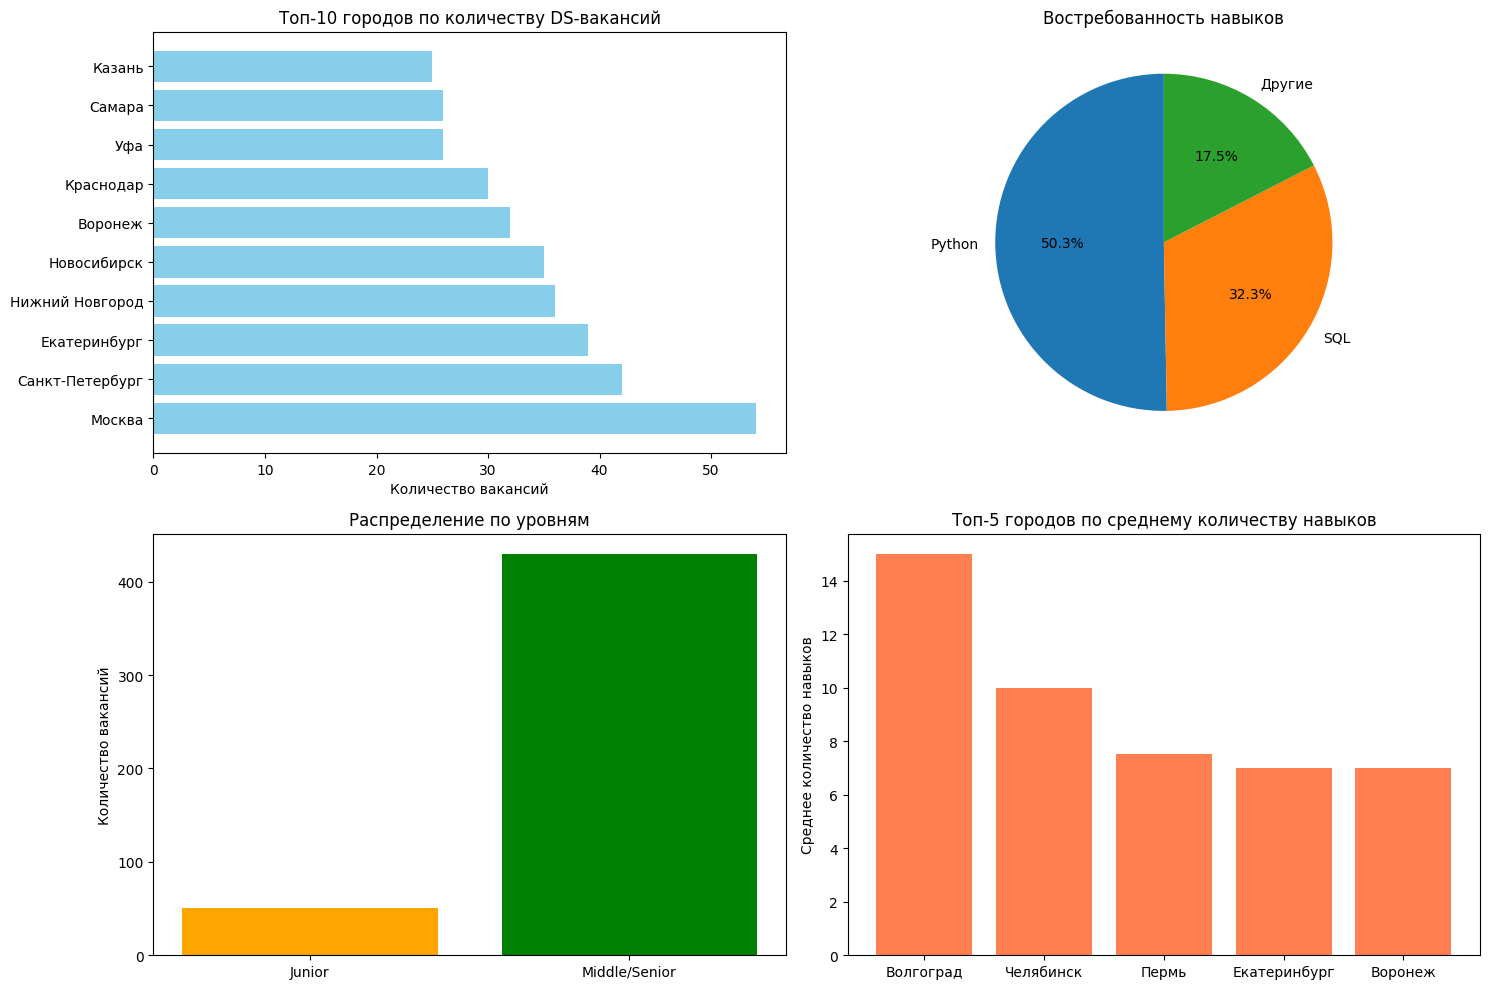

 Визуализация сохранена в файл: ds_analysis_visualization.png


In [492]:
# Дополнительно: визуализация
try:
    import matplotlib.pyplot as plt
    import numpy as np
    
    # График: Топ-10 городов по вакансиям
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Топ городов
    top10 = analyzer.cities_data.nlargest(10, 'vacancies')
    axes[0, 0].barh(top10['city'], top10['vacancies'], color='skyblue')
    axes[0, 0].set_title('Топ-10 городов по количеству DS-вакансий')
    axes[0, 0].set_xlabel('Количество вакансий')
    
    # 2. Навыки
    skills = ['Python', 'SQL', 'Другие']
    values = [analyzer.results['python_vacancies'], 
              analyzer.results['sql_vacancies'],
              analyzer.results['total_ds'] - analyzer.results['python_vacancies']]
    axes[0, 1].pie(values, labels=skills, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Востребованность навыков')
    
    # 3. Junior vs Total
    axes[1, 0].bar(['Junior', 'Middle/Senior'], 
                   [analyzer.results['junior_vacancies'], 
                    analyzer.results['total_ds'] - analyzer.results['junior_vacancies']],
                   color=['orange', 'green'])
    axes[1, 0].set_title('Распределение по уровням')
    axes[1, 0].set_ylabel('Количество вакансий')
    
    # 4. Средние навыки по городам
    top5_skills = analyzer.cities_data.nlargest(5, 'avg_skills')
    axes[1, 1].bar(top5_skills['city'], top5_skills['avg_skills'], color='coral')
    axes[1, 1].set_title('Топ-5 городов по среднему количеству навыков')
    axes[1, 1].set_ylabel('Среднее количество навыков')
    
    plt.tight_layout()
    plt.savefig('ds_analysis_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Визуализация сохранена в файл: ds_analysis_visualization.png")
except ImportError:
    print("")